In [2]:
from preamble import *
from LocalDatasets import read_did_pred,read_did_preds,read_did_predSummary,saveDict,readDict,ScoresFromPredictions,read_features
plt.rcParams['savefig.dpi'] = 200 # This controls the size of your figuresope
# Comment out and restart notebook if you only want the last output of each cell.
InteractiveShell.ast_node_interactivity = "all" 
import seaborn as sns

In [2]:
list_of_datasets = []
func = 'cvScoreNoise5'
clfName = 'RandomForestClassifier'
amount = 3
path = 'D:\\DropboxFolder\\Dropbox\\afstudeer\\results\\' + func + '\\' + clfName + '\\' + str(amount) + '\\'
for (dirpath, dirnames, filenames) in os.walk(path):
    for dirname in dirnames:
        list_of_datasets.append(int(dirname))


In [3]:
import csv,ast
newpath = 'D:\\DropboxFolder\\Dropbox\\afstudeer\\results\\did\\'
with open(newpath + str(1043) + '.csv', 'r') as f:
    reader2 = csv.reader(f)
    your_dict = list(reader2)
new_dict = []
for i in your_dict:
    if not i == []:
        new_dict.append([])
        for j in i:
            new_dict[len(new_dict)-1].append(ast.literal_eval(j))
new_dict = new_dict[0][0]    

In [4]:
scores = {}
name = 'scores'
for i in list_of_datasets:
    scores[i] = read_did_pred(func,clfName,amount,i,name)

In [1]:
legend_X = list_of_datasets
score1= []
score2 = []
score3 = []
score4 = []
MaxClass = []
j = 0
for i in legend_X:
    score1.append(sum(scores[i][0])/len(scores[i][0]))
    score2.append(sum(scores[i][1])/len(scores[i][1]))
    score3.append(sum(scores[i][2])/len(scores[i][2]))
    score4.append(sum(scores[i][3])/len(scores[i][3]))
    j = j + 1
    MaxClass.append(readDict(i)['MajorityClassSize']/readDict(i)['NumberOfInstances'])


NameError: name 'scores' is not defined

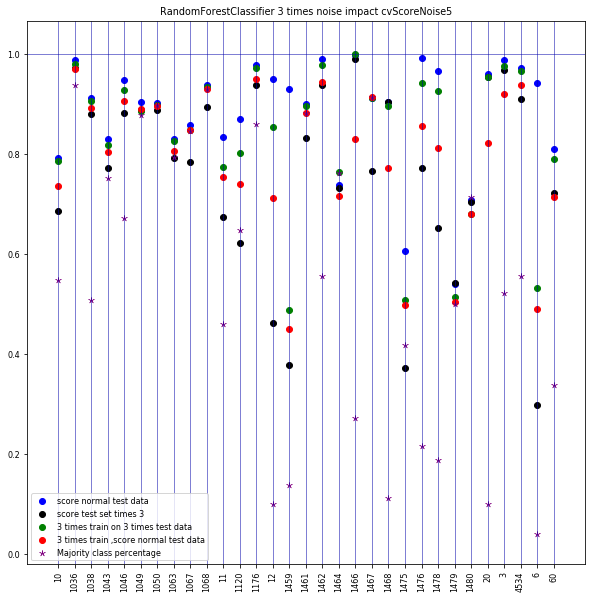

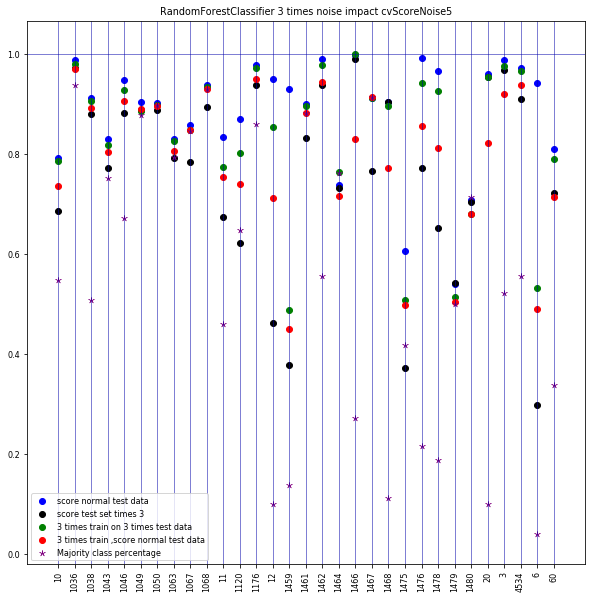

In [13]:
x_axis = range(0,len(score1))
fig, ax = plt.subplots()
_=plt.title(clfName + ' ' + str(amount) + ' times noise impact ' + func)
_=ax.scatter(x_axis, score1,color='b',label="score normal test data")
_=ax.scatter(x_axis, score2,color= 'black', label = 'score test set times ' + str(amount))
_=ax.scatter(x_axis, score3,color= 'g', label = str(amount) + ' times train on '+ str(amount) + ' times test data')
_=ax.scatter(x_axis, score4,color= 'red', label = str(amount) + ' times train ,score normal test data')
_=ax.scatter(x_axis,MaxClass,color = 'purple', marker=(5, 2),label = 'Majority class percentage')
_=plt.xticks(x_axis,legend_X ,rotation='vertical')
fig.set_figheight(10)
fig.set_figwidth(10)
_=ax.axhline(y=1)
for i in x_axis:
    _=ax.axvline(x=i)
_=ax.legend()
plt.show()

## comparing different noise levels

In [2]:
list_of_datasets = []
listFunc = ['cvScoreNoise2','cvScoreNoise3']
clfName = 'SGDClassifier'
# listAmount = [-10,-8,-6,-5,-4,-3,-2,-1,1,2,3,4,5,6,8,10]
listAmount = [-10,-9,-8-2,-1,1,2,3]
did = 18
scores = []
name = 'scores'
count = []
# for j in amountList:        
#     scores.append(read_did_pred('cvScoreNoise2',clfName,j,did,name))
#     count.append(str(j))
# listAmount = [-1,-0.8,-0.6,-0.4,-0.2,0.2,0.4,0.6,0.8,1,1.2,1.3,1.4,1.5,1.6,1.8,1.9]
listAmount = [-2.5,-2,-1.6,-1.4,-1.2,-1,-0.8,-0.6,-0.4,-0.2,0.2,0.4,0.6,0.8,1,1.2,1.3,1.4,1.5,1.6,1.8,1.9,2,2.1,2.2,2.3,2.4,3,4,5,10,20,30,40,50]
listAmount = [0.6,0.8,1.5,2]
for j in listAmount:        
    scores.append(read_did_pred('cvScoreNoise3',clfName,j,did,name))
    count.append(str(j*100))

# for j in listAmount:    
#     scores.append(read_did_pred('cvScoreNoise4',clfName,j,did,name))
#     count.append('cvScoreNoise4' + ',' + str(j))
# for j in listAmount:
#     scores.append(read_did_pred('cvScoreNoise5',clfName,j,did,name))
#     count.append('cvScoreNoise5' + ',' + str(j))
# func = 'cvScoreNoise4'
# for amount in listAmount:
#     scores.append(ScoresFromPredictions(func,clfName,amount,did,'kappa'))
#     count.append(func + ',' + str(amount))


In [3]:
legend_X = list_of_datasets
score1= []
score2 = []
score3 = []
score4 = []
MaxClass = []
j = 0
for i in range(0,len(scores)):
    score1.append(sum(scores[i][0])/len(scores[i][0]))
    score2.append(sum(scores[i][1])/len(scores[i][1]))
    score3.append(sum(scores[i][2])/len(scores[i][2]))
    score4.append(sum(scores[i][3])/len(scores[i][3]))
    j = j + 1
    MaxClass.append(readDict(did)['MajorityClassSize']/readDict(did)['NumberOfInstances'])

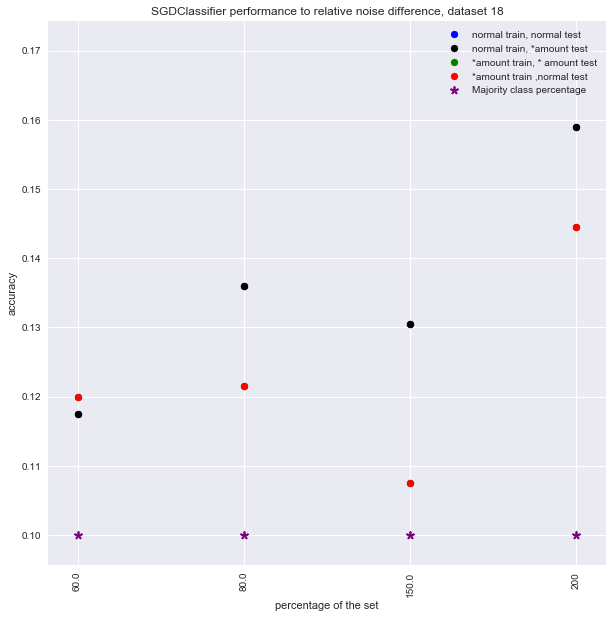

In [4]:
x_axis = range(0,len(score1))
fig, ax = plt.subplots()
_=plt.title(clfName +   ' performance to relative noise difference, dataset ' + str(did))
_=ax.scatter(x_axis, score1,color='b',label="normal train, normal test")
_=ax.scatter(x_axis, score2,color= 'black', label = 'normal train, *amount test')
_=ax.scatter(x_axis, score3,color= 'g', label = '*amount train, * amount test')
_=ax.scatter(x_axis, score4,color= 'red', label = '*amount train ,normal test')
_=ax.scatter(x_axis,MaxClass,color = 'purple', marker=(5, 2),label = 'Majority class percentage')
_=plt.xticks(x_axis,count ,rotation='vertical')
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('percentage of the set')
fig.set_figheight(10)
fig.set_figwidth(10)
# _=ax.axhline(y=1)
# for i in x_axis:
#     _=ax.axvline(x=i)
_=ax.legend()
plt.show()

## Looking at strange results, great difference in prediction accuracy

In [112]:
listWeird = []
scoreC2 = []
scoreC4 = []
legendC_X = []
for i in range(0,len(score1)):
    if score4[i] > score2[i] + 0.1:
        scoreC2.append(score2[i])
        scoreC4.append(score4[i])
#         legendC_X.append(legend_X[i])
#         readDict(legend_X[i]).get('NumberOfNumericFeatures')/readDict(legend_X[i]).get('NumberOfFeatures')

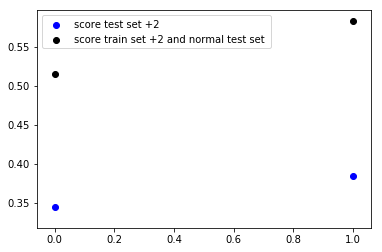

In [113]:
x_axis = range(0,len(scoreC2))
fig, ax = plt.subplots()
# _=plt.title('RandomForestClassifier')
_=ax.scatter(x_axis, scoreC2,color='b',label="score test set +2")
_=ax.scatter(x_axis, scoreC4,color= 'black', label = 'score train set +2 and normal test set ')
# _=plt.xticks(x_axis,legendC_X ,rotation='vertical')
_=ax.legend()

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from LocalDatasets import read_did
failScores1 = []
for i in listFail1:
    X,y = read_did(i)
    clf = RandomForestClassifier()
    failScores1.append(cross_val_score(clf, X, y, cv=10, n_jobs = -1, scoring="accuracy").mean())

In [125]:
did = 60
summary = []
clfName = 'RandomForestClassifier'
name = 'SummaryGuesses'
count = []
# for j in listAmount:        
#     scores.append(read_did_pred('cvScoreNoise2',clfName,j,did,name))
#     count.append('cvScoreNoise2' + ',' + str(j))
# listAmount = [-1,-0.8,-0.6,-0.4,-0.2,0.2,0.4,0.6,0.8,1,1.2,1.3,1.4,1.5,1.6,1.8,1.9]
listAmount = [-20,-10,-8,-6,-5,-4,-3,-2.5,-2,-1.6,-1.4,-1.2,-1,-0.8,-0.6,-0.4,-0.2,0.2,0.4,0.6,0.8,1,1.2,1.3,1.4,1.5,1.6,1.8,1.9,2,2.1,2.2,2.3,2.4,3,4,5,10,20,30,40,50]

for j in listAmount:        
    summary.append(read_did_predSummary('cvScoreNoise3',clfName,amount,did,name))
    
    count.append('cvScoreNoise3' + ',' + str(j))

In [239]:
did = 60
predictions = []
clfName = 'RandomForestClassifier'
name = 'Predictions'
count = []
# for j in listAmount:        
#     scores.append(read_did_pred('cvScoreNoise2',clfName,j,did,name))
#     count.append('cvScoreNoise2' + ',' + str(j))
# listAmount = [-1,-0.8,-0.6,-0.4,-0.2,0.2,0.4,0.6,0.8,1,1.2,1.3,1.4,1.5,1.6,1.8,1.9]
listAmount = [-20,-10,-8,-6,-5,-4,-3,-2.5,-2,-1.6,-1.4,-1.2,-1,-0.8,-0.6,-0.4,-0.2,0.2,0.4,0.6,0.8,1,1.2,1.3,1.4,1.5,1.6,1.8,1.9,2,2.1,2.2,2.3,2.4,3,4,5,10,20,30,40,50]
amount = 3
for did in list_of_datasets:        
    predictions.append(read_did_preds('cvScoreNoise5',clfName,amount,did,name))

In [244]:
# correct = 0
# predict1_is0 = 0
# predict1_is2 = 0
pred = []
classes = []
for did in list_of_datasets:
    classes.append(readDict(did)['NumberOfClasses'])
# classes = readDict(did)['NumberOfClasses']
for y in range(0,4):
    pred.append([])
    for k in range(0,len(predictions)):
        pred[y].append([])
        for i in range(0,classes[k]):
            pred[y][k].append([])
            for j in range(0,classes[k]):
                pred[y][k][i].append(0)
# predict
on10 = 0
for y in range(0,4):
    for j in range(0,len(predictions)):
        for on10 in range(0,10):
            for i in range(0,len(predictions[0][0][on10 ])):
                pred[y][j][predictions[j][4][on10][i]][predictions[j][y][on10][i]] = pred[y][j][predictions[j][4][on10][i]][predictions[j][y][on10][i]] + 1


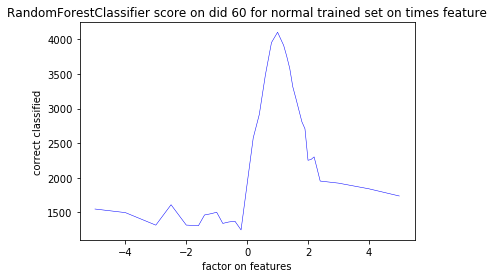

In [115]:
fig, ax = plt.subplots()
_=plt.title('RandomForestClassifier score on did 60 for normal trained set on times feature')
_=ax.scatter(listAmount[4:len(listAmount)-5], scur[4:len(listAmount)-5],color='b',label="score test set +2")
_=plt.ylabel('correct classified')
_=plt.xlabel('factor on features')

## Feature reduction or addition(scalability)

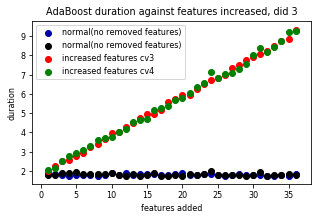

In [52]:
from LocalDatasets import read_duration,readDict
did = 3
features = readDict(did)['NumberOfFeatures']
func = 'cvScoreFeatures3'
func2 = 'cvScoreFeatures4'
clfName = 'AdaBoost'
dur1 = []
dur2 = []
dur3 = []
dur4 = []
type = 0
for amount in range(1,features):
    dur1.append(read_duration(func,clfName,did,amount)[type])
    dur2.append(read_duration(func,clfName,did,amount)[type+2])
    dur3.append(read_duration(func2,clfName,did,amount)[type])
    dur4.append(read_duration(func2,clfName,did,amount)[type+2])
_=plt.scatter(range(1,features),dur1, label = 'normal(no removed features)')
_=plt.scatter(range(1,features),dur3, label = 'normal(no removed features)',color = 'black')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4':
    _=plt.scatter(range(1,features),dur2,color = 'r',label = 'increased features cv3')
    _=plt.scatter(range(1,features),dur4,color = 'g',label = 'increased features cv4')
else:
    _=plt.scatter(range(1,features),dur2,color = 'r',label = 'reduced features')
if func == 'cvScoreFeatures3' or func == 'cvScoreFeatures4':
    _=plt.title(clfName + ' duration against features increased, did ' + str(did))
else:
    _=plt.title(clfName + ' duration against features removed, did' + str(did))
_=plt.ylabel('duration')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4':
    _=plt.xlabel('features added')
else:
    _=plt.xlabel('features removed')
# _=plt.yscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

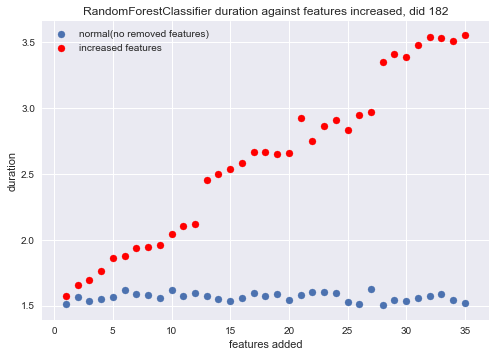

In [38]:
from LocalDatasets import read_duration,readDict
did = 182
features = readDict(did)['NumberOfFeatures']
func = 'cvScoreFeatures4'
clfName = 'RandomForestClassifier'
dur1 = []
dur2 = []
dur3 = []
dur4 = []
type = 0
ranges = range(1,features-1)
for amount in ranges:
    dur1.append(read_duration(func,clfName,did,amount)[type])
    dur2.append(read_duration(func,clfName,did,amount)[type+2])
_=plt.scatter(ranges,dur1, label = 'normal(no removed features)')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4':
    _=plt.scatter(ranges,dur2,color = 'r',label = 'increased features')
else:
    _=plt.scatter(ranges,dur2,color = 'r',label = 'reduced features')
if func == 'cvScoreFeatures3' or func == 'cvScoreFeatures4':
    _=plt.title(clfName + ' duration against features increased, did ' + str(did))
else:
    _=plt.title(clfName + ' duration against features removed, did ' + str(did))
_=plt.ylabel('duration')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4':
    _=plt.xlabel('features added')
else:
    _=plt.xlabel('features removed')
#_=plt.yscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

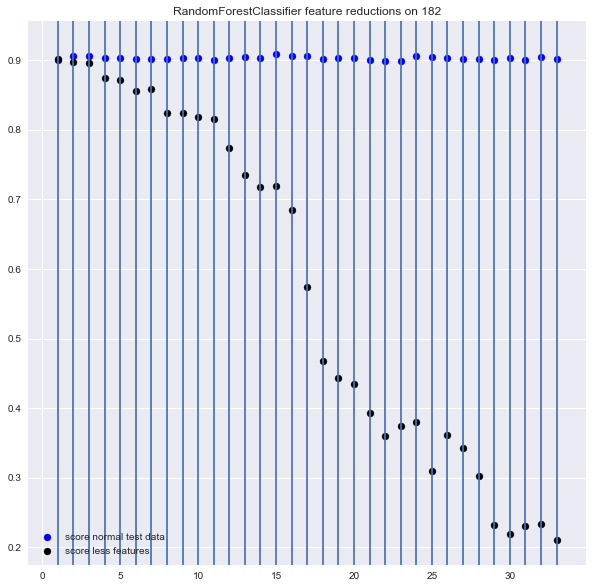

In [35]:
from LocalDatasets import readDict,read_features,readDict
did = 182
func = 'TestMissing'
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4':
    legend_X = range(1,readDict(did)['NumberOfFeatures'])
else:
    legend_X = range(1,readDict(did)['NumberOfFeatures']-3)

clfName = 'RandomForestClassifier'

scores = []
name = 'scores'
if func == 'TestMissing':    
    for amount in legend_X:
        scores.append(read_did_pred(func,clfName,did,amount,name))
else:
    for amount in legend_X:
        scores.append(read_features(func,clfName,did,amount))

score1= []
score2 = []
MaxClass = []
j = 0
for i in legend_X:
    if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4':
        score1.append(scores[i-1][0])
        score2.append(scores[i-1][1])
    elif func == 'TestMissing':
        score1.append(sum(scores[i-1][0])/10)
        score2.append(sum(scores[i-1][1])/10)
    else:
        score1.append(scores[i-1][0])
        score2.append(scores[i-1][1])
    j = j + 1
#     MaxClass.append(readDict(did)['MajorityClassSize']/readDict(did)['NumberOfInstances'])
x_axis = legend_X
fig, ax = plt.subplots()
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4':
    _=plt.title(clfName  + ' feature increase on ' + str(did))
else:
    _=plt.title(clfName  + ' feature reductions on ' + str(did))
_=ax.scatter(x_axis, score1,color='b',label="score normal test data")
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4':
    _=ax.scatter(x_axis, score2,color= 'black', label = 'score' + ' more features')
else:
    _=ax.scatter(x_axis, score2,color= 'black', label = 'score' + ' less features')
# _=ax.scatter(x_axis,MaxClass,color = 'purple', marker=(5, 2),label = 'Majority class percentage')
# if func == 'cvScoreFeatures3':
#     _=plt.xticks(x_axis,legend_X ,rotation='vertical')
# else:
#     _=plt.xticks(x_axis,reversed(legend_X) ,rotation='vertical')
fig.set_figheight(10)
fig.set_figwidth(10)
# _=ax.axhline(y=1)
for i in x_axis:
    _=ax.axvline(x=i)
_=ax.legend()
plt.show()

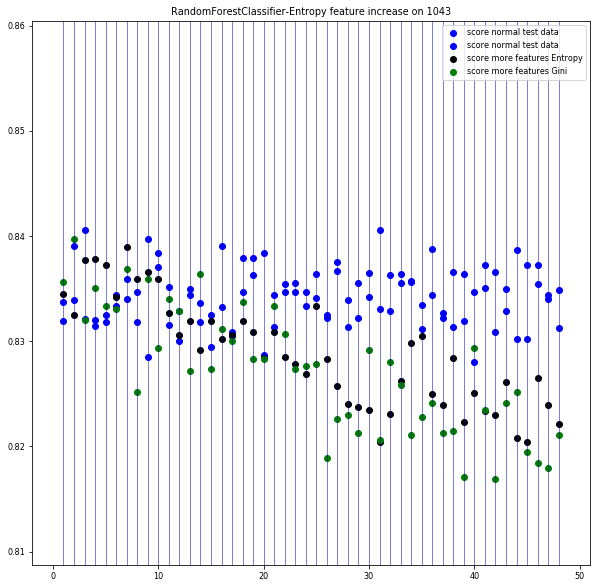

In [75]:
from LocalDatasets import readDict,read_features,readDict
did = 1043
func = 'cvScoreFeatures4'
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4':
    legend_X = range(1,readDict(did)['NumberOfFeatures'])
else:
    legend_X = range(0,readDict(did)['NumberOfFeatures']-1)

clfName = 'RandomForestClassifier-Entropy'
clfName2 = 'RandomForestClassifier-Gini'
scores = []
scores2 = []
for amount in legend_X:
    scores.append(read_features(func,clfName,did,amount))
    scores2.append(read_features(func,clfName2,did,amount))
score1= [[],[]]
score2 = [[],[]]
MaxClass = []
j = 0
for i in legend_X:
    if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4':
        score1[0].append(scores[i-1][0])
        score1[1].append(scores2[i-1][0])
        score2[0].append(scores[i-1][1])
        score2[1].append(scores2[i-1][1])
    else:
        score1.append(scores[i][0])
        score2.append(scores[i][1])
    j = j + 1
#     MaxClass.append(readDict(did)['MajorityClassSize']/readDict(did)['NumberOfInstances'])
x_axis = range(1,len(score1[0])+1)
fig, ax = plt.subplots()
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4':
    _=plt.title(clfName  + ' feature increase on ' + str(did))
else:
    _=plt.title(clfName  + ' feature reductions on ' + str(did))
_=ax.scatter(x_axis, score1[0],color='b',label="score normal test data")
_=ax.scatter(x_axis, score1[1],color='b',label="score normal test data")
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4':
    _=ax.scatter(x_axis, score2[0],color= 'black', label = 'score' + ' more features Entropy')
    _=ax.scatter(x_axis, score2[1],color= 'green', label = 'score' + ' more features Gini')
else:
    _=ax.scatter(x_axis, score2,color= 'black', label = 'score' + ' less features')
# _=ax.scatter(x_axis,MaxClass,color = 'purple', marker=(5, 2),label = 'Majority class percentage')
# if func == 'cvScoreFeatures3':
#     _=plt.xticks(x_axis,legend_X ,rotation='vertical')
# else:
#     _=plt.xticks(x_axis,reversed(legend_X) ,rotation='vertical')
fig.set_figheight(10)
fig.set_figwidth(10)
# _=ax.axhline(y=1)
for i in x_axis:
    _=ax.axvline(x=i)
_=ax.legend()
plt.show()

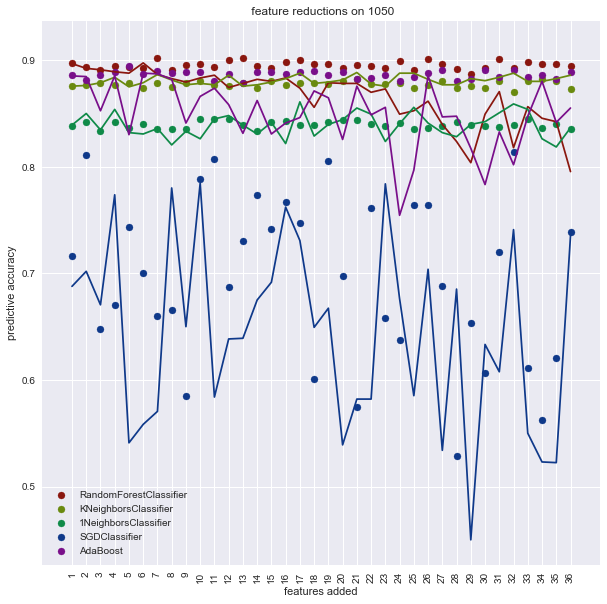

In [117]:
clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost']#, 'SVC-rbf']#, 'SVC-linear','SVC-poly']#, 'GaussianNB', 'BernoulliNB', 'MultinomialNB']
from LocalDatasets import readDict,read_features,readDict
did = 1050
func = 'cvScoreFeatures5'
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4':
    legend_X = range(1,readDict(did)['NumberOfFeatures'])
else:
    legend_X = range(0,readDict(did)['NumberOfFeatures'])

# clfName = 'MultinomialNB'
amount = 1
scores = []
features = readDict(did)['NumberOfFeatures']
for amount in range(1,features-1):
    scores.append([])    
    for clfName in clfNames:
        scores[amount-1].append(read_features(func,clfName,did,amount))
score1= []
score2 = []
for i in clfNames:
    score1.append([])
    score2.append([])
MaxClass = []
j = 0
for amount in range(1,features-1):
    cl = 0
    for clfName in clfNames:
        score1[cl].append(scores[amount-1][cl][0])
        score2[cl].append(scores[amount-1][cl][1])
        
        cl = cl + 1

x_axis = range(0,len(score1[0]))
fig, ax = plt.subplots()
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4':
    _=plt.title(' feature increase on ' + str(did))
else:
    _=plt.title(' feature reductions on ' + str(did))
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(score1)):
    _= ax.scatter(x_axis,score1[i], label = clfNames[i],color = cl[i] )
    _= ax.plot(x_axis,score2[i], color = cl[i] )

amountList = range(1,features-1)
_=plt.xticks(x_axis,amountList ,rotation='vertical')
fig.set_figheight(10)
fig.set_figwidth(10)
# _=ax.axhline(y=1)
# for i in x_axis:
#     _=ax.axvline(x=i)
_=ax.legend()
plt.xlabel('features added')
plt.ylabel('predictive accuracy')
plt.show()


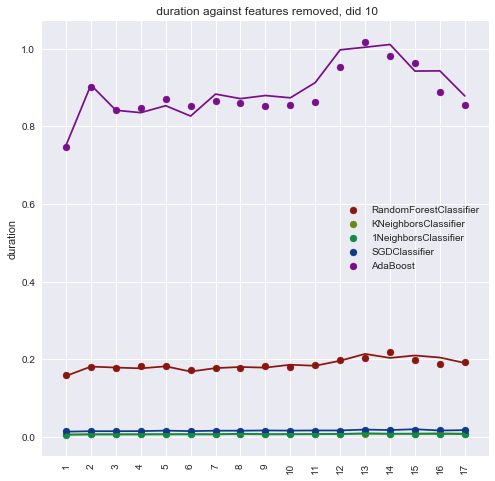

In [88]:
from LocalDatasets import read_duration,readDict

clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost']#, 'SVC-rbf']#, 'SVC-linear','SVC-poly']#, 'GaussianNB', 'BernoulliNB', 'MultinomialNB']

did = 10
features = readDict(did)['NumberOfFeatures']
func = 'cvScoreFeatures5'
# clfName = 'AdaBoost'
dur1 = []
dur2 = []
typ = 0
fig, ax = plt.subplots()
cs = 0
for clfName in clfNames:
    dur1.append([])
    dur2.append([])
    for amount in range(1,features-1):
        dur1[cs].append(read_duration(func,clfName,did,amount)[typ])
        dur2[cs].append(read_duration(func,clfName,did,amount)[typ+2])
    cs = cs+1
cl = sns.hls_palette(len(dur1), l=.3, s=.8)
x_axis = range(0,len(dur1[0]))        
for i in range(0,len(dur1)):
    _= ax.scatter(x_axis,dur1[i], label = clfNames[i],color = cl[i] )
    _= ax.plot(x_axis,dur2[i], color = cl[i] )
_=plt.xticks(x_axis,range(1,features-1) ,rotation='vertical')
_=plt.title(' duration against features removed, did ' + str(did))
_=plt.ylabel('duration')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4':
    _=plt.xlabel('features added')
elif func == 'cvScoreFeatures1':
    _=plt.xlabel('features removed')
#_=plt.yscale("log", nonposy='clip')
fig.set_figheight(8)
fig.set_figwidth(8)
_=plt.legend()
_=plt.show()

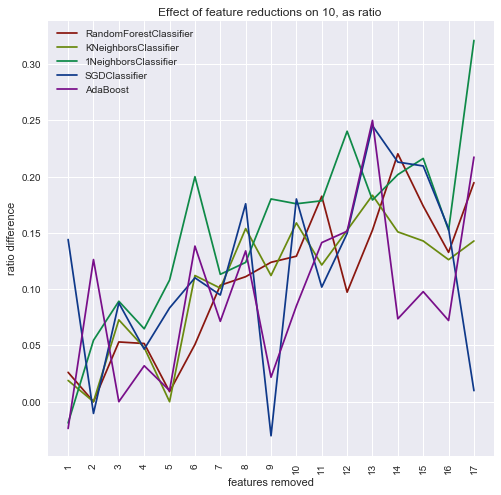

In [86]:
clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost']#, 'SVC-rbf', 'SVC-linear','SVC-poly']#, 'GaussianNB', 'BernoulliNB', 'MultinomialNB']
from LocalDatasets import readDict,read_features,readDict
did = 10
func = 'cvScoreFeatures5'
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4':
    legend_X = range(1,readDict(did)['NumberOfFeatures'])
else:
    legend_X = range(0,readDict(did)['NumberOfFeatures'])

# clfName = 'MultinomialNB'
amount = 1
scores = []
features = readDict(did)['NumberOfFeatures']
for amount in range(1,features-1):
    scores.append([])    
    for clfName in clfNames:
        scores[amount-1].append(read_features(func,clfName,did,amount))
score1= []
score2 = []
ratio = []
for i in clfNames:
#     score1.append([])
#     score2.append([])
    ratio.append([])
MaxClass = []
j = 0
for amount in range(1,features-1):
    cl = 0
    for clfName in clfNames:
#         score1[cl].append(scores[amount-1][cl][0])
#         score2[cl].append(scores[amount-1][cl][1])
        if not scores[amount-1][cl][0] == 0:
            ratio[cl].append((scores[amount-1][cl][0]-scores[amount-1][cl][1])/scores[amount-1][cl][0])
        else:
            ratio[cl].append(0)
        cl = cl + 1

x_axis = range(0,len(ratio[0]))
fig, ax = plt.subplots()
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4':
    _=plt.title(' feature increase on ' + str(did))
else:
    _=plt.title('Effect of feature reductions on ' + str(did) + ', as ratio ')
cl = sns.hls_palette(len(ratio), l=.3, s=.8)
for i in range(0,len(ratio)):
    _= ax.plot(x_axis,ratio[i], label = clfNames[i], color = cl[i] )

amountList = range(1,features-1)
_=plt.xticks(x_axis,amountList ,rotation='vertical')
fig.set_figheight(8)
fig.set_figwidth(8)
_=plt.ylabel('ratio difference')
_=plt.xlabel('features removed')
# _=ax.axhline(y=1)
# for i in x_axis:
#     _=ax.axvline(x=i)
_=ax.legend()
plt.show()

##  Comparing multiple classifiers

In [19]:
list_of_datasets = []
listFunc = ['cvScoreNoise2','cvScoreNoise3']
clfName = 'KNeighborClassifier'
amountList = [-10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# listAmount = [-10,-9,-8-2,-1,1,2,3]
did = 1459
scores = []
name = 'scores'
count = []
# for j in amountList:        
#     scores.append(read_did_pred('cvScoreNoise2',clfName,j,did,name))
#     count.append(str(j))
# listAmount = [-1,-0.8,-0.6,-0.4,-0.2,0.2,0.4,0.6,0.8,1,1.2,1.3,1.4,1.5,1.6,1.8,1.9]
# listAmount = [-2.5,-2,-1.6,-1.4,-1.2,-1,-0.8,-0.6,-0.4,-0.2,0.2,0.4,0.6,0.8,1,1.2,1.3,1.4,1.5,1.6,1.8,1.9,2,2.1,2.2,2.3,2.4,3,4,5,10,20,30,40,50]
# amountList = [-20,-10,-8,-6,-5,-4,-3,-2.5,-2,-1.6,-1.4,-1.2,-1,-0.8,-0.6,-0.4,-0.2,0.2,0.4,0.6,0.8,1,1.2,1.3,1.4,1.5,1.6,1.8,1.9,2,2.1,2.2,2.3,2.4,3,4,5,10,20,30,40,50]
# amountList = [-1,-0.8,-0.6,-0.4,-0.2,0.2,0.4,0.6,0.8,1,1.2,1.3,1.4,1.5,1.6,1.8,1.9,2]
# amountList = [0.6,0.8,1.5,2]
# amountList = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.30000000000000004, 0.19999999999999996, 0.09999999999999998, -0.10000000000000009, -0.19999999999999996, -0.30000000000000004, -0.3999999999999999, -0.5, -0.6000000000000001, -0.7, -0.8, -0.8999999999999999, -1.0]
clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf']#, 'SVC-linear','SVC-poly']#, 'GaussianNB', 'BernoulliNB', 'MultinomialNB']
func = 'cvScoreNoise2'
for clfName in clfNames:   
    j = 0
    score1 = []
    for amount in amountList:
        score1.append(read_did_pred(func,clfName,amount,did,name))
    scores.append(score1)
    count.append(str(j*100))
count = []
for amount in amountList:
    count.append(str(amount))

# for j in listAmount:    
#     scores.append(read_did_pred('cvScoreNoise4',clfName,j,did,name))
#     count.append('cvScoreNoise4' + ',' + str(j))
# for j in listAmount:
#     scores.append(read_did_pred('cvScoreNoise5',clfName,j,did,name))
#     count.append('cvScoreNoise5' + ',' + str(j))
# func = 'cvScoreNoise4'
# for amount in listAmount:
#     scores.append(ScoresFromPredictions(func,clfName,amount,did,'kappa'))
#     count.append(func + ',' + str(amount))

In [20]:
legend_X = list_of_datasets
score1= []
score2 = []
score3 = []
score4 = []
for i in clfNames:
    score1.append([])
    score2.append([])
    score3.append([])
    score4.append([])
MaxClass = []
j = 0
for j in range(0,len(scores)):    
    for i in range(0,len(scores[j])):
        score1[j].append(sum(scores[j][i][0])/len(scores[j][i][0]))
        score2[j].append(sum(scores[j][i][1])/len(scores[j][i][1]))
        score3[j].append(sum(scores[j][i][2])/len(scores[j][i][2]))
        score4[j].append(sum(scores[j][i][3])/len(scores[j][i][3]))
#     MaxClass.append(readDict(did)['MajorityClassSize']/readDict(did)['NumberOfInstances'])

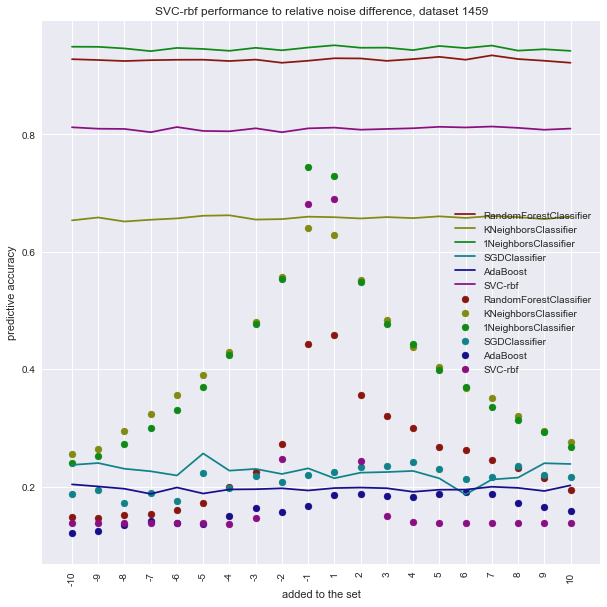

In [23]:
x_axis = range(0,len(score1[0]))
fig, ax = plt.subplots()
_=plt.title(clfName +   ' performance to relative noise difference, dataset ' + str(did))
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(x_axis, score1[i],label=clfNames[i], color = cl[i])
#     _=ax.scatter(x_axis, score2[i], label = clfNames[i],color = cl[i])
    _=ax.plot(x_axis, score3[i],label = clfNames[i],color = cl[i])
    _=ax.scatter(x_axis, score4[i],label = clfNames[i],color = cl[i])
# _=ax.scatter(x_axis,MaxClass,color = 'purple', marker=(5, 2),label = 'Majority class percentage')
_=plt.xticks(x_axis,count ,rotation='vertical')
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('added to the set')
fig.set_figheight(10)
fig.set_figwidth(10)
# _=ax.axhline(y=1)
# for i in x_axis:
#     _=ax.axvline(x=i)
_=ax.legend()
plt.show()

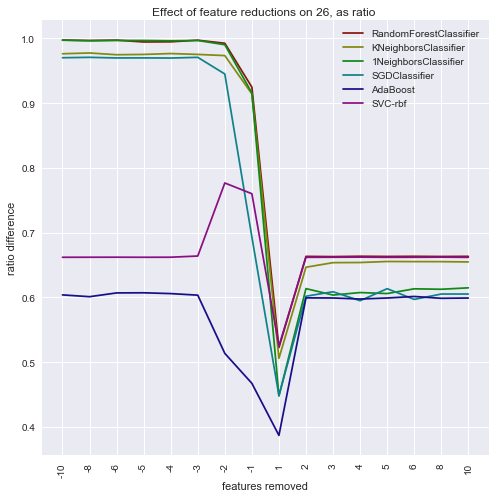

In [10]:
# clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost']#, 'SVC-rbf', 'SVC-linear','SVC-poly']#, 'GaussianNB', 'BernoulliNB', 'MultinomialNB']
# from LocalDatasets import readDict,read_features,readDict
# did = 16
# func = 'cvScoreFeatures1'
# if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4':
#     legend_X = range(1,readDict(did)['NumberOfFeatures'])
# else:
#     legend_X = range(0,readDict(did)['NumberOfFeatures'])

# # clfName = 'MultinomialNB'
# amount = 1
# scores = []
features = readDict(did)['NumberOfFeatures']
# for amount in range(1,features-1):
#     scores.append([])    
#     for clfName in clfNames:
#         scores[amount-1].append(read_features(func,clfName,did,amount))

ratio = []
for i in clfNames:
#     score1.append([])
#     score2.append([])
    ratio.append([])
MaxClass = []
j = 0
for amount in range(0,len(amountList)):
    cl = 0
    for clfName in clfNames:
#         score1[cl].append(scores[amount-1][cl][0])
#         score2[cl].append(scores[amount-1][cl][1])
        if not score1[cl][amount] == 0:
            ratio[cl].append((score1[cl][amount]-score2[cl][amount])/score1[cl][amount])
        else:
            ratio[cl].append(0)
        cl = cl + 1

x_axis = range(0,len(ratio[0]))
fig, ax = plt.subplots()
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4':
    _=plt.title(' feature increase on ' + str(did))
else:
    _=plt.title('Effect of feature reductions on ' + str(did) + ', as ratio ')
cl = sns.hls_palette(len(ratio), l=.3, s=.8)
for i in range(0,len(ratio)):
    _= ax.plot(x_axis,ratio[i], label = clfNames[i], color = cl[i] )

#amountList = range(1,features-1)
_=plt.xticks(x_axis,amountList ,rotation='vertical')
fig.set_figheight(8)
fig.set_figwidth(8)
_=plt.ylabel('ratio difference')
_=plt.xlabel('features removed')
# _=ax.axhline(y=1)
# for i in x_axis:
#     _=ax.axvline(x=i)
_=ax.legend()
plt.show()

In [8]:
did = 1491
scores = []
name = 'scores0'
count = []
clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf', 'GaussianNB', 'BernoulliNB']
func = 'cvFeatureSTD1'
amountList = [0.25,0.5,0.75,1,1.5,2,3,4,5,6]
amountList = [0.5,0.7,1,2,3,4]
for clfName in clfNames:   
    j = 0
    score1 = []
    for amount in amountList:
        score1.append(read_did_pred(func,clfName,did,amount,name))
    scores.append(score1)
    count.append(j)
count = []
for amount in amountList:
    count.append(str(amount))

In [5]:
# legend_X = list_of_datasets
score1= []
score2 = []
score3 = []
score4 = []
for i in clfNames:
    score1.append([])
    score2.append([])
    score3.append([])
    score4.append([])
MaxClass = []
j = 0
for j in range(0,len(scores)):    
    for i in range(0,len(scores[j])):
        score1[j].append(sum(scores[j][i][0])/len(scores[j][i][0]))
        score2[j].append(sum(scores[j][i][1])/len(scores[j][i][1]))

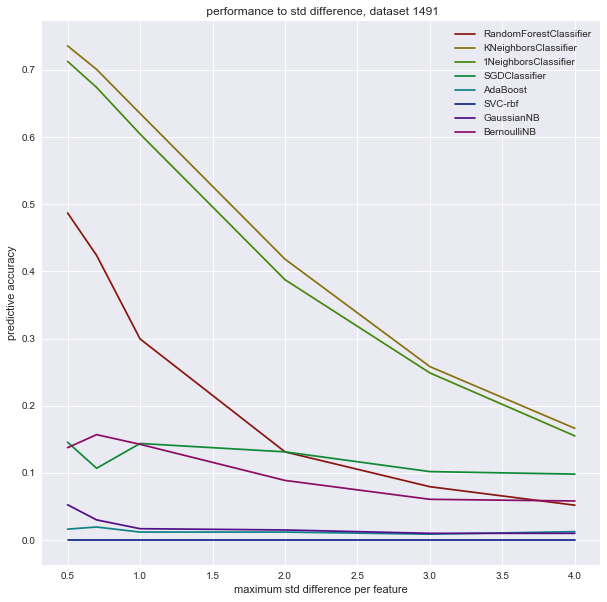

In [6]:
x_axis = amountList#range(0,len(score1[0]))
fig, ax = plt.subplots()
_=plt.title(' performance to std difference, dataset ' + str(did))
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(x_axis, score1[i], color = cl[i])
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
# _=ax.scatter(x_axis,MaxClass,color = 'purple', marker=(5, 2),label = 'Majority class percentage')
# _=plt.xticks(x_axis,count ,rotation='vertical')
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('maximum std difference per feature')
fig.set_figheight(10)
fig.set_figwidth(10)
# _=ax.axhline(y=1)
# for i in x_axis:
#     _=ax.axvline(x=i)
_=ax.legend()
plt.show()

In [6]:
did = 12
scores = []
name = 'scores0'
clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf', 'GaussianNB', 'BernoulliNB']
# func = 'cvFeatureSTD1'
amountList = [0,0.25,0.5,0.75,1,1.5,2,3,4,5,6]
didList = [12,14,16,18,22,28,30,32,36,37]
func = 'cvfeatureSTD1'
# amountList = [0.5,0.6,0.7,0.75,0.8,0.9,1,2,3,4,5,6]
# didList = [20, 21, 26, 333, 334, 335]#, 40668, 4135, 4534, 469, 46, 50]
for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            score1.append(read_features(func,clfName,did,amount))
        scores[i].append(score1)
count = []
for amount in amountList:
    count.append(str(amount))

In [7]:
score1= []
score2 = []
score3 = []
score4 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList))])
    score3.append([0 for i in range(len(amountList))])
    score4.append([0 for i in range(len(amountList))])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][i] = score1[j][i] + (scores[k][j][i][0])/len(didList)
            score2[j][i] = score2[j][i] + (scores[k][j][i][1])/len(didList)
for i,x in enumerate(score1):
    for j,x2 in enumerate(x):
        ratio[i].append((x2-score2[i][j])/x2)

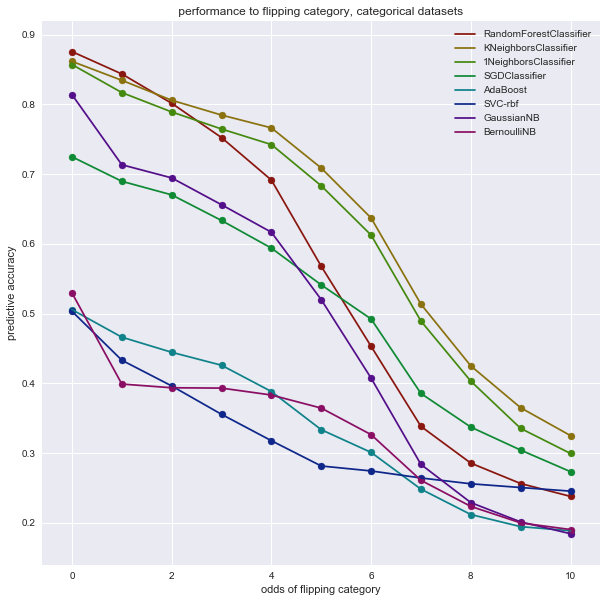

In [8]:
# flipped = []
# for i in amountList:
#     if i > 0.5:
#         flipped.append((1-1/(i+0.5))*100)
#     else:
#         flipped.append(0)
x_axis = range(0,len(score1[0]))
fig, ax = plt.subplots()
_=plt.title(' performance to flipping category, categorical datasets ')
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(x_axis, score1[i], color = cl[i])
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i])
# _=ax.scatter(x_axis,MaxClass,color = 'purple', marker=(5, 2),label = 'Majority class percentage')
# _=plt.xticks(x_axis,count ,rotation='vertical')
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('odds of flipping category')
fig.set_figheight(10)
fig.set_figwidth(10)
# _=ax.axhline(y=1)
# for i in x_axis:
#     _=ax.axvline(x=i)
_=ax.legend()
plt.show()

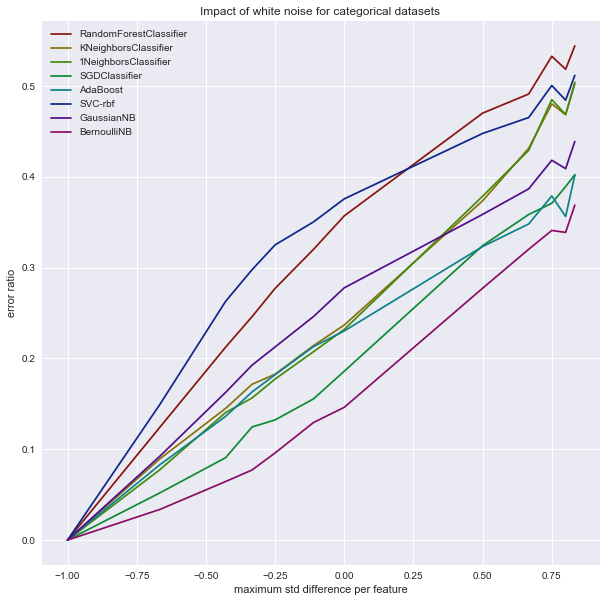

In [107]:
flipped = []
for i in amountList:
    flipped.append(1-1/i)
x_axis = flipped#range(0,len(score1[0]))
fig, ax = plt.subplots()
_=plt.title('Impact of white noise for categorical datasets ')
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(x_axis, score1[i], color = cl[i])
    _=ax.plot(x_axis, ratio[i],label=clfNames[i], color = cl[i])
# _=ax.scatter(x_axis,MaxClass,color = 'purple', marker=(5, 2),label = 'Majority class percentage')
# _=plt.xticks(x_axis,count ,rotation='vertical')
_=plt.ylabel('error ratio')
_=plt.xlabel('maximum std difference per feature')
fig.set_figheight(10)
fig.set_figwidth(10)
# _=ax.axhline(y=1)
# for i in x_axis:
#     _=ax.axvline(x=i)
_=ax.legend()
plt.show()

## Adding existing features 

In [52]:
scores = []
clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf', 'BernoulliNB']
func = 'cvScoreFeatures5'
amountList = [0,0.25,0.5,0.75,1,1.5,2,3,4,5,6]
amountList = [0.25,0.5,0.75,1]
didList = NonCat
# didList2 = [3,20, 21, 26, 333, 334, 335]#, 40668, 4135, 4534, 469, 46, 50]
# for i in didList2:
#     didList.append(i)
    
# didList = [3,20, 21, 26, 333, 334, 335]

for i,did in enumerate(didList):
    scores.append([])
    for clfName in clfNames:
        score1 = []
        for amount in amountList:
            score1.append(read_features(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
        scores[i].append(score1)
count = []
for amount in amountList:
    count.append(str(amount*100))

In [53]:
score1= []
score2 = []
score3 = []
score4 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList))])
    score3.append([0 for i in range(len(amountList))])
    score4.append([0 for i in range(len(amountList))])
    ratio.append([])
MaxClass = []
j = 0
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            score1[j][i] = score1[j][i] + (scores[k][j][i][0])/len(didList)
            score2[j][i] = score2[j][i] + (scores[k][j][i][1])/len(didList)
for i,x in enumerate(score1):
    for j,x2 in enumerate(x):
        ratio[i].append((x2-score2[i][j])/x2)

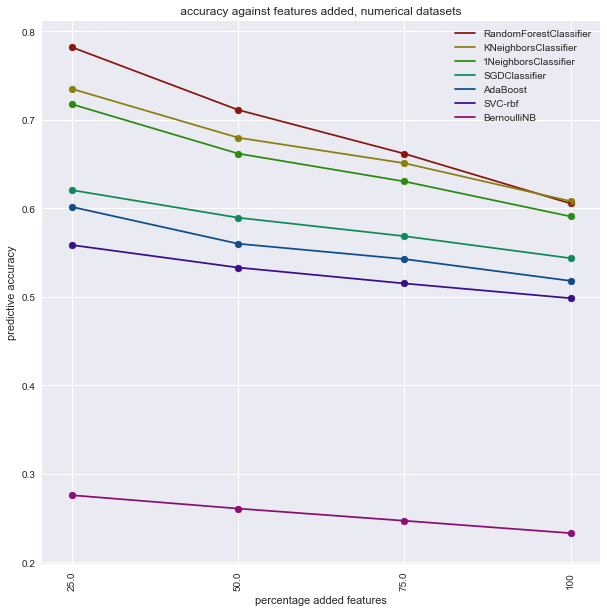

In [54]:
x_axis = amountList#range(0,len(score1[0]))
fig, ax = plt.subplots()
_=plt.title(' accuracy against features added, numerical datasets ' )
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(x_axis, score1[i], color = cl[i])
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i])
# _=ax.scatter(x_axis,MaxClass,color = 'purple', marker=(5, 2),label = 'Majority class percentage')
_=plt.xticks(x_axis,count ,rotation='vertical')
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('percentage added features')
fig.set_figheight(10)
fig.set_figwidth(10)
# _=ax.axhline(y=1)
# for i in x_axis:
#     _=ax.axvline(x=i)
_=ax.legend()
plt.show()

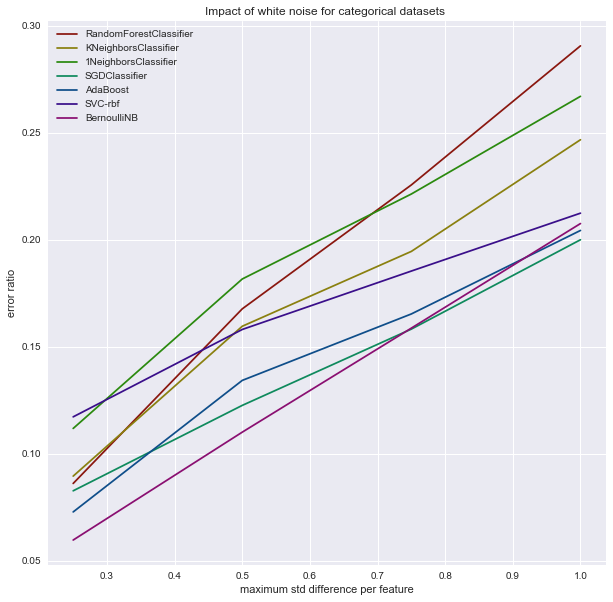

In [55]:
x_axis = amountList#range(0,len(score1[0]))
fig, ax = plt.subplots()
_=plt.title('Impact of white noise for categorical datasets ')
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(x_axis, score1[i], color = cl[i])
    _=ax.plot(x_axis, ratio[i],label=clfNames[i], color = cl[i])
# _=ax.scatter(x_axis,MaxClass,color = 'purple', marker=(5, 2),label = 'Majority class percentage')
# _=plt.xticks(x_axis,count ,rotation='vertical')
_=plt.ylabel('error ratio')
_=plt.xlabel('maximum std difference per feature')
fig.set_figheight(10)
fig.set_figwidth(10)
# _=ax.axhline(y=1)
# for i in x_axis:
#     _=ax.axvline(x=i)
_=ax.legend()
plt.show()

In [224]:
score1 = []
score2 = []
score3 = []
score4 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList))])
    score3.append([0 for i in range(len(amountList))])
    score4.append([0 for i in range(len(amountList))])
    ratio.append([])
MaxClass = []
j = 0
score2.append([0 for i in range(len(amountList))])

In [293]:
read_features(func,clfName,amount,did)
did = 18
scores = []
name = 'scores0'
count = []
clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf', 'GaussianNB', 'BernoulliNB']
func = 'cvFeatureSTD1'
amountList = [0.25,0.5,0.75,1,1.5,2,3,4,5,6]
for clfName in clfNames:   
    j = 0
    score1 = []
    for amount in amountList:
        score1.append(read_features(func,clfName,did,amount))
    scores.append(score1)
    count.append(j)
count = []
for amount in amountList:
    count.append(str(amount))

[0, 0]

In [294]:
# legend_X = list_of_datasets
score1= []
score2 = []
score3 = []
score4 = []
for i in clfNames:
    score1.append([])
    score2.append([])
    score3.append([])
    score4.append([])
MaxClass = []
j = 0
for j in range(0,len(scores)):    
    for i in range(0,len(scores[j])):
        score1[j].append(scores[j][i][0])
        score2[j].append(scores[j][i][1])

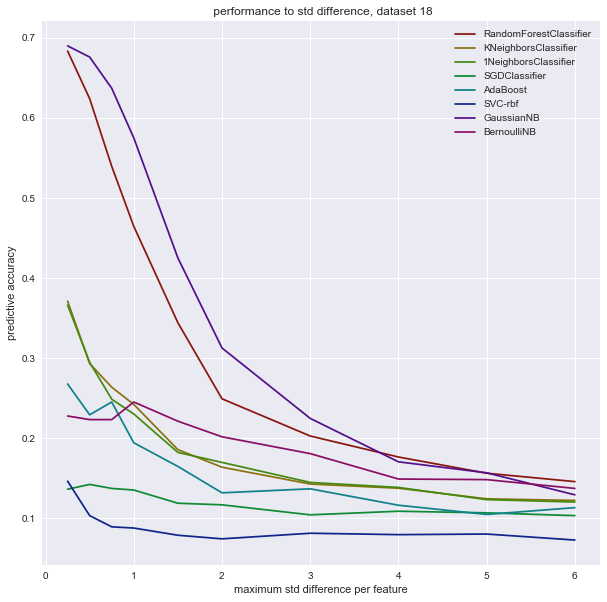

In [295]:
x_axis = amountList#range(0,len(score1[0]))
fig, ax = plt.subplots()
_=plt.title(' performance to std difference, dataset ' + str(did))
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(x_axis, score1[i], color = cl[i])
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
# _=ax.scatter(x_axis,MaxClass,color = 'purple', marker=(5, 2),label = 'Majority class percentage')
# _=plt.xticks(x_axis,count ,rotation='vertical')
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('maximum std difference per feature')
fig.set_figheight(10)
fig.set_figwidth(10)
# _=ax.axhline(y=1)
# for i in x_axis:
#     _=ax.axvline(x=i)
_=ax.legend()
plt.show()

In [28]:
ar = 3
area = []
for j,x in enumerate(clfNames):
    ar = j
    area.append(0)
    for i,x in enumerate(score2[ar]):
        if not i == 0:
            height = abs(x-score2[ar][i-1])
            length = abs(amountList[i]-amountList[i-1])
            area[j] = area[j] + height*length/2 + x*length
# area

In [29]:
bib = {}
for i,x in enumerate(clfNames):
    bib[area[i]] = x

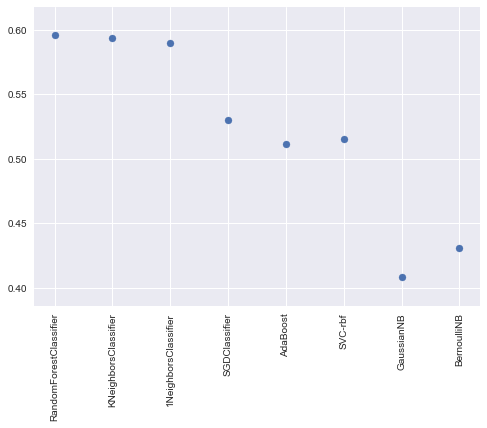

In [30]:
axzis = range(len(area))
plt.scatter(axzis,area)
_=plt.xticks(axzis,clfNames ,rotation='vertical')
plt.show()


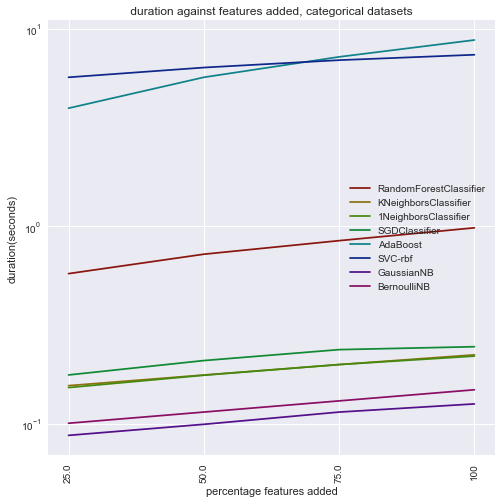

In [124]:
from LocalDatasets import read_duration,readDict
didList = [3,20, 21, 26, 333, 334, 335]
clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf', 'GaussianNB', 'BernoulliNB']
# 
did = 20
features = readDict(did)['NumberOfFeatures']
func = 'cvScoreFeatures4'

dur1 = []
dur2 = []
typ = 0
fig, ax = plt.subplots()
cs = 0
amountList = [0.25,0.5,0.75,1] 
for i,x in enumerate(clfNames):
    dur2.append([])
    for j,x in enumerate(amountList):
        dur2[i].append(0) 
for did in didList:
    for cs,clfName in enumerate(clfNames):
        for i,amount in enumerate(amountList):
#             dur1[cs][i] = dur1[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ])
            dur2[cs][i] = dur2[cs][i] + read_duration(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1)))[typ+2]/len(didList)

#         cs = cs+1
cl = sns.hls_palette(len(dur2), l=.3, s=.8)
x_axis = range(0,len(dur2[0])) 
for i,x in enumerate(amountList):
    amountList[i] = x*100
for i in range(0,len(dur2)):
#     _= ax.scatter(x_axis,dur1[i], label = clfNames[i],color = cl[i] )
    _= ax.plot(x_axis,dur2[i], color = cl[i],label = clfNames[i] )
_=plt.xticks(x_axis,amountList ,rotation='vertical')
_=plt.title(' duration against features added, categorical datasets ')
_=plt.ylabel('duration(seconds)')
if func == 'cvScoreFeatures3'or func == 'cvScoreFeatures4' or func == 'cvScoreFeatures5':
    _=plt.xlabel('percentage features added')
elif func == 'cvScoreFeatures1':
    _=plt.xlabel('features removed')
#_=plt.yscale("log", nonposy='clip')
fig.set_figheight(8)
fig.set_figwidth(8)
ax.set_yscale("log", nonposy='clip')
_=plt.legend()
_=plt.show()

In [1]:
NonCat = [1038,
 1043,
 1046,
 1049,
 1050,
 1063,
 1067,
 1068,
 1120,
 1176,
 11,
 12,
 1459,
 1462,
 1464,
 1466,
 1467,
 1468,
 1475,
 1476,
 1478,
 1479,
 1485,
 1487,
 1489,
 1491,
 1492,
 1493,
 1494,
 1497,
 14,
 1501,
 1504,
 1510,
 1515,
 1570,
 16,
 18,
 22,
 28,
 300,
 30,
 32,
 36,
 375,
 37,
 39,
 40499,
 40509,
 40,
 4134,
 41,
 44,
 4538,
 458,
 53,
 54]

In [8]:
from LocalDatasets import readDict
MajorityClass = 0
for i in NonCat:
    MajorityClass = MajorityClass + readDict(i)['MajorityClassSize']/readDict(i)['NumberOfInstances']

In [14]:
readDict(14)

{'MajorityClassSize': 200,
 'MaxNominalAttDistinctValues': 10,
 'MinorityClassSize': 200,
 'NumberOfClasses': 10,
 'NumberOfFeatures': 77,
 'NumberOfInstances': 2000,
 'NumberOfInstancesWithMissingValues': 0,
 'NumberOfMissingValues': 0,
 'NumberOfNumericFeatures': 76,
 'NumberOfSymbolicFeatures': 1,
 'did': 14,
 'format': 'ARFF',
 'name': 'mfeat-fourier',
 'status': 'active'}

In [82]:
didList

[1038,
 1043,
 1046,
 1049,
 1050,
 1063,
 1067,
 1068,
 1120,
 1176,
 11,
 12,
 1459,
 1462,
 1464,
 1466,
 1467,
 1468,
 1475,
 1476,
 1478,
 1479,
 1485,
 1487,
 1489,
 1491,
 1492,
 1493,
 1494,
 1497,
 14,
 1501,
 1504,
 1510,
 1515,
 1570,
 16,
 18,
 22,
 28,
 300,
 30,
 32,
 36,
 375,
 37,
 39,
 40499,
 40509,
 40,
 4134,
 41,
 44,
 4538,
 458,
 53,
 54]

In [70]:
dur1 = []
for i,x in enumerate(clfNames):
    dur1.append([])
    for j,x in enumerate(amountList):
        dur1[i].append(0) 

In [79]:
i

0